Zadaniem jest określenie typów wina na podstawie poniższego zbioru danych:
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html
- Przeprowadź krótką wstępną analizę danych
- Stwórz funkcję budującą model (DNN)
- Przeprowadź trening i walidację wyników
- Na podstawie historii treningu przedstaw zmianę funkcji loss
- Sprawdź jak zmiana hiperparametrów i architektury Twojej sieci wpływa na wyniki i przedstaw swoje obserwacje

In [17]:
# downloading libraries 

import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

from keras.layers import Dropout
from keras.optimizers import RMSprop

In [7]:
from sklearn.datasets import load_wine
data = load_wine()
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

From data set characteristics it seems we have 13 features and 3 classes to predict. Each class is another type of wine. 

In [8]:
# Creating a DataFrame

df = pd.DataFrame(data=np.c_[data['data'], data['target']],
                  columns=data['feature_names'] + ['target'])

print(df.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols   
0    14.23        1.71  2.43               15.6      127.0           2.80  \
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue   
0        3.06                  0.28             2.29             5.64  1.04  \
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

In [9]:
# Checking the distribution of classes

print(df['target'].value_counts())

target
1.0    71
0.0    59
2.0    48
Name: count, dtype: int64


In [10]:
# Creating function for DNN model

def build_model(input_shape, num_classes):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(input_shape,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    return model

In [11]:
# training the model
X_train, X_test, Y_train, Y_test = train_test_split(data['data'], data['target'], test_size=0.2, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

model = build_model(X_train.shape[1], Y_train.shape[1])

history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=20, batch_size=32)


Epoch 1/20
5/5 [==============================] - 1s 78ms/step - loss: 1.1196 - accuracy: 0.3662 - val_loss: 0.8964 - val_accuracy: 0.6111
Epoch 2/20
5/5 [==============================] - 0s 20ms/step - loss: 0.9193 - accuracy: 0.5845 - val_loss: 0.7369 - val_accuracy: 0.8889
Epoch 3/20
5/5 [==============================] - 0s 15ms/step - loss: 0.7570 - accuracy: 0.8169 - val_loss: 0.5988 - val_accuracy: 0.9722
Epoch 4/20
5/5 [==============================] - 0s 13ms/step - loss: 0.6244 - accuracy: 0.9155 - val_loss: 0.4822 - val_accuracy: 0.9722
Epoch 5/20
5/5 [==============================] - 0s 10ms/step - loss: 0.5138 - accuracy: 0.9366 - val_loss: 0.3852 - val_accuracy: 0.9722
Epoch 6/20
5/5 [==============================] - 0s 10ms/step - loss: 0.4176 - accuracy: 0.9789 - val_loss: 0.3047 - val_accuracy: 1.0000
Epoch 7/20
5/5 [==============================] - 0s 12ms/step - loss: 0.3360 - accuracy: 0.9789 - val_loss: 0.2406 - val_accuracy: 1.0000
Epoch 8/20
5/5 [===========

With each epoch, the loss decreases for both the training and validation data, which is a good sign. The model's accuracy also increases, reaching 100% accuracy on both the training and validation data in the final epochs. In this case, it appears that the model is not overfitting, as the results for the validation set are similar to those for the training set.

However, a perfectly matched model on the training and validation data can also be a signal that the model is overly fitted to a specific dataset and may have trouble generalizing to new, unseen data. 

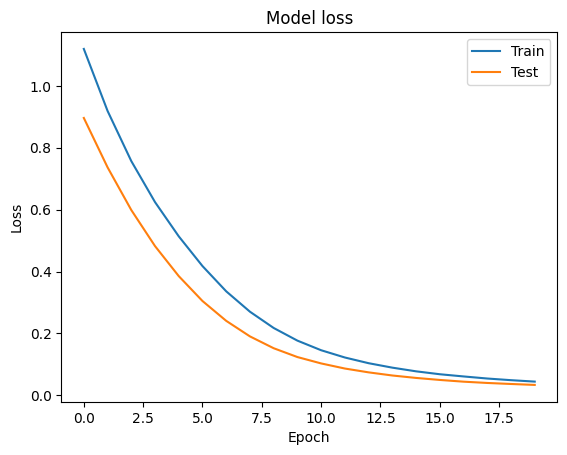

In [13]:
# loss function changes

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()


We can see that the training and test lines decrease at a similar rate, which means that the model is learning and generalizing well.

To see how changes of hyperparamters and architecture may impact the results, following changes will be introduced to modify model above:

 - Number of neurons: In each dense layer, the number of neurons will increase from 64 to 128. This may allow the network to learn more complex representations, but at the same time, it increases the risk of overfitting.

 - Dropout layers: Dropout layers will be added, which "turn off" randomly selected neurons during training, helping to prevent overfitting. A value of 0.5 means that 50% of neurons are "turned off" during each training iteration.

 - Optimizer: the optimizer will change from "adam" to "RMSprop". Different optimizers work in slightly different ways and can affect the speed and stability of the learning process.

 - Number of epochs: the number of epochs will inrcrease from 20 to 50, which means the network is trained for more iterations. This can lead to a better result, but it also increases the risk of overfitting.

- Batch size: the batch size will increase from 32 to 64. The batch size is the number of samples that are propagated through the network simultaneously. A larger batch size can speed up the learning process but may be less accurate.


In [16]:
def build_modified_model(input_shape, num_classes):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(input_shape,)))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer=RMSprop(lr=0.001), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    return model

model = build_modified_model(X_train.shape[1], Y_train.shape[1])
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=50, batch_size=64)


Epoch 1/50
3/3 [==============================] - 1s 104ms/step - loss: 1.0154 - accuracy: 0.4859 - val_loss: 0.6667 - val_accuracy: 1.0000
Epoch 2/50
3/3 [==============================] - 0s 21ms/step - loss: 0.7225 - accuracy: 0.7394 - val_loss: 0.4887 - val_accuracy: 1.0000
Epoch 3/50
3/3 [==============================] - 0s 18ms/step - loss: 0.6002 - accuracy: 0.8380 - val_loss: 0.3756 - val_accuracy: 1.0000
Epoch 4/50
3/3 [==============================] - 0s 20ms/step - loss: 0.5103 - accuracy: 0.8592 - val_loss: 0.2996 - val_accuracy: 1.0000
Epoch 5/50
3/3 [==============================] - 0s 18ms/step - loss: 0.3735 - accuracy: 0.9296 - val_loss: 0.2451 - val_accuracy: 1.0000
Epoch 6/50
3/3 [==============================] - 0s 19ms/step - loss: 0.4263 - accuracy: 0.8803 - val_loss: 0.2036 - val_accuracy: 1.0000
Epoch 7/50
3/3 [==============================] - 0s 17ms/step - loss: 0.3254 - accuracy: 0.9155 - val_loss: 0.1749 - val_accuracy: 0.9722
Epoch 8/50
3/3 [==========

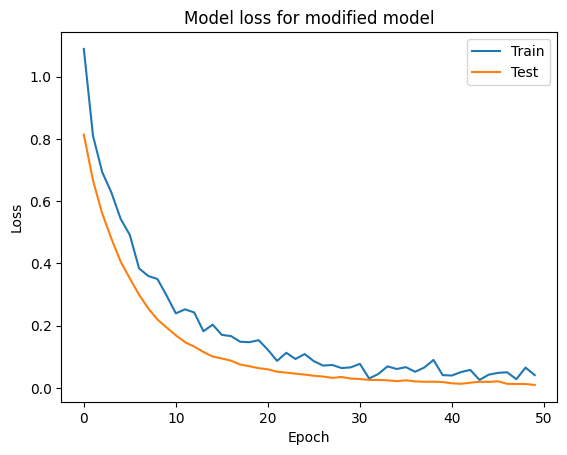

In [15]:
# loss function for modified model: 

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss for modified model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

The chart shows how the loss function for the training and testing sets changes over successive training epochs. We can observe whether the model is learning (loss decreasing) and whether overfitting occurs (loss on the testing set starts to increase).

Both models achieve 100% accuracy on the validation set. However, When comparing the results of models, the original one and modified, we can observe several differences:

- Learning speed: The modified model achieves 100% accuracy on the validation set after only 1 epoch, while the original model requires 6 epochs. This may indicate that the additional Dropout layers and increased number of neurons helped the model understand the data dependencies faster.

- Stability of results: The modified model appears to be more stable, maintaining 100% accuracy on the validation set for most epochs. The original model achieves 100% accuracy on the validation set, but then drops to 97.22% in the 10th epoch, only to return to 100% and maintain that level. This increased stability of the modified model may be due to the additional Dropout layers, which help prevent overfitting.

- Convergence of loss function: The loss function for the modified model converges to 0 much faster than for the original model. After 50 epochs, the modified model reaches a loss function value of approximately 0.0024, while after 20 epochs, the original model has a loss function value of around 0.0335. This may indicate that the modified model is better optimized.

In summary, based on the provided training logs, the modified model seems to perform better. However, to obtain a complete picture, it is also worth testing both models on a separate, independent test set. Additionally, it is always important to consider the potential risk of overfitting when achieving 100% accuracy.